### **What’s the Main Idea Behind SVM?**
Imagine you’re trying to draw a line to separate two groups of points on a graph. Easy, right? But what happens when the points overlap or scatter in ways that make a simple straight line inadequate? This is where **SVM (Support Vector Machines)** shines, by finding the **best possible boundary (or hyperplane)** to separate the data by finding the best boundary line (or hyperplane) that separates different classes of data points. It doesn’t just draw any line — it draws the line that maximizes the margin between the two classes.

---
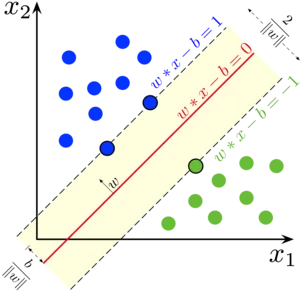

### **Key Concepts of SVM**

- **What is the margin?**
  The margin is the "buffer zone" on either side of the hyperplane. It’s the distance between the hyperplane and the closest data points from each class, known as **support vectors**.
  
- **Why maximize the margin?**
  SVM chooses the hyperplane that maximizes this margin, ensuring the model is as confident as possible about its classification.

- **Support Vectors-**
The points closest to the boundary (hyperplane) are the **support vectors**. These points are crucial in defining the position of the hyperplane. The farther the margin extends from these points, the better the separation.

---

### **The Kernel Trick: When a Line Isn’t Enough**
In real-world data, the classes are often not linearly separable (you can’t use a straight line to divide them). SVM solves this problem using **kernels**. Kernels transform the data into a higher-dimensional space, where it becomes easier to separate with a straight line.

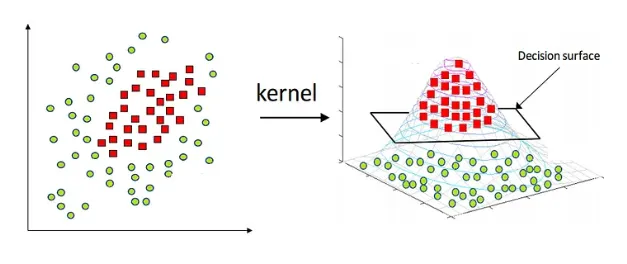

Imagine trying to separate two sets of points arranged in a circular pattern. In 2D, it’s impossible to draw a straight line. But if you “lift” the points into a 3D space, you could use a plane to slice them apart.

#### **Popular Kernels in SVM**
1. **Linear Kernel**: Works for data that is already linearly separable.
2. **Polynomial Kernel**: Handles data with more complex relationships.
3. **RBF (Radial Basis Function) Kernel**: Great for data with intricate patterns or clusters, and it’s one of the most commonly used kernels.

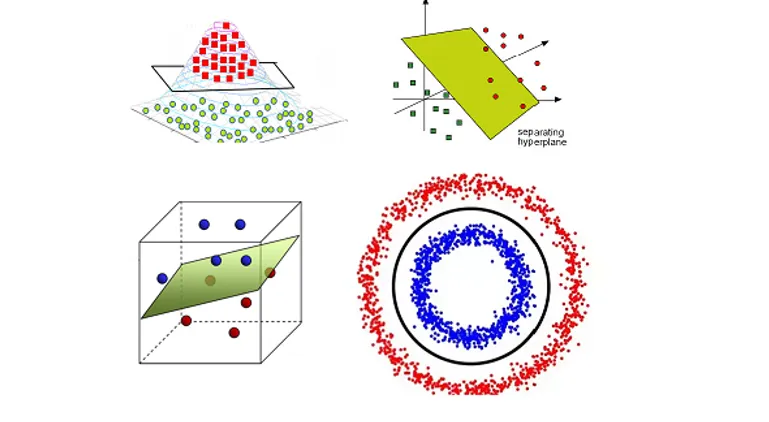

For a good intuitive understanding of the formula, refer to https://youtu.be/bM4_AstaBZo?si=b4a1s34X_rzNwFyQ

In [1]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    #the gap between the margins
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

[0.58977016 0.17946483] -0.1520000000000001


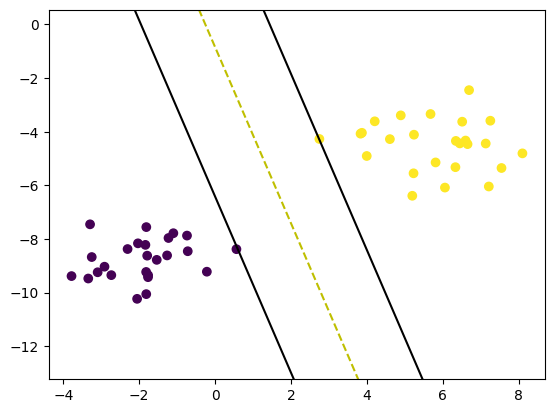

In [5]:

# Testing
if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    import matplotlib.pyplot as plt

    X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
    y = np.where(y == 0, -1, 1)

    clf = SVM()
    clf.fit(X, y)
    # predictions = clf.predict(X)

    print(clf.w, clf.b)

    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()